In [2]:
import Pkg; Pkg.add("Plots")


  Installing known registries into `~/.julia`
       Added `General` registry to ~/.julia/registries
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed GR_jll ─────────────────────── v0.73.16+0
   Installed LERC_jll ───────────────────── v4.0.1+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed libdecor_jll ───────────────── v0.2.2+0
   Installed JpegTurbo_jll ──────────────── v3.1.1+0
   Installed libfdk_aac_jll ─────────────── v2.0.3+0
   Installed Libmount_jll ───────────────── v2.41.0+0
   Installed Preferences ────────────────── v1.4.3
   Installed LoggingExtras ──────────────── v1.1.0
   Installed Opus_jll ───────────────────── v1.3.3+0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.7+0
   Installed RelocatableFolders ─────────── v1.0.1
   Installed Unitful ────────────────────── v1.23.1
   Installed Contour ────────────────────── v0.6.3
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.2+0
   Installed Conc

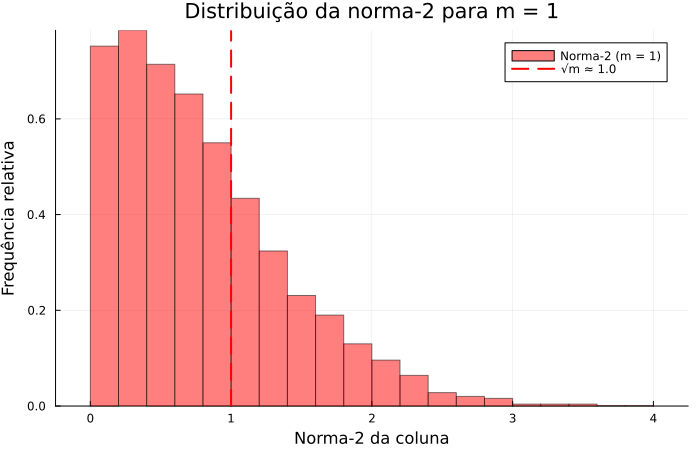

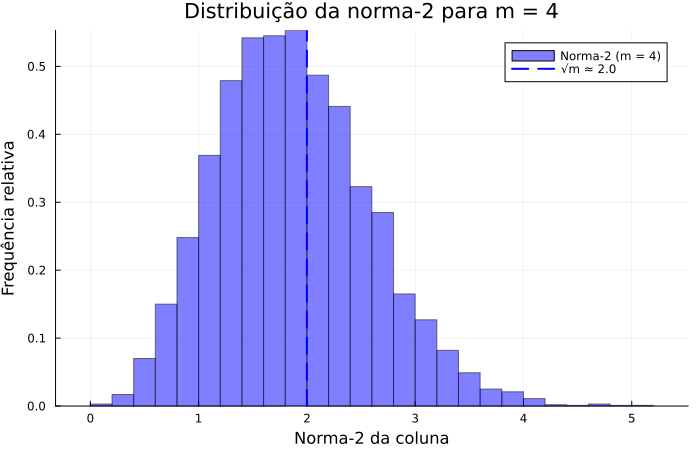

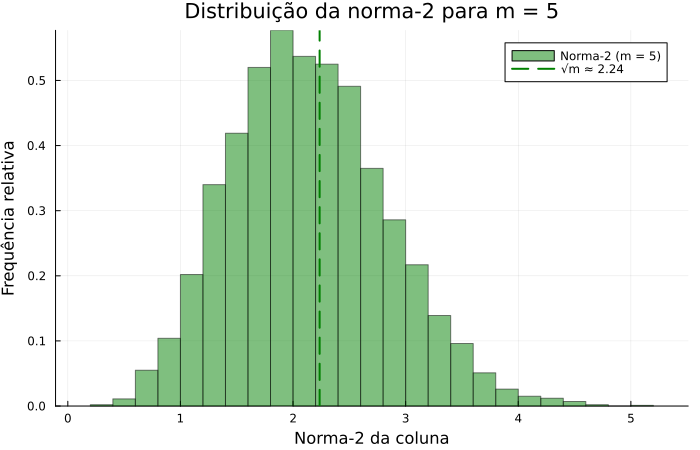

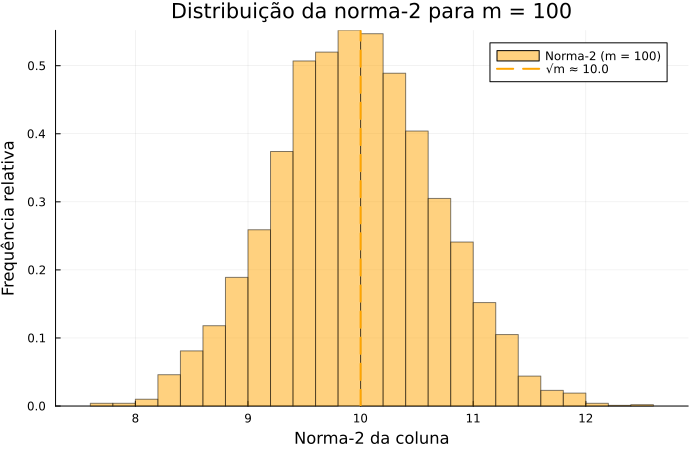

In [ ]:
using Random
using LinearAlgebra
using Plots

#Questão a)

n = 1000
ms = [1, 4, 5, 100]  
colors = [:red, :blue, :green, :orange]

for (i, m) in enumerate(ms)
    A = randn(m, n)
    norms = [norm(A[:,j], 2) for j in 1:n]
    plt = histogram(norms, bins=30, alpha=0.5, normalize=true, 
                    color=colors[i], label="Norma-2 (m = $m)",
                    xlabel="Norma-2 da coluna", ylabel="Frequência relativa",
                    title="Distribuição da norma-2 para m = $m", legend=:topright, size=(700,450))
    valor = round(sqrt(m), digits=2)
    vline!([sqrt(m)], color=colors[i], linewidth=2, linestyle=:dash, 
           label="√m ≈ $valor")
    display(plt)
end


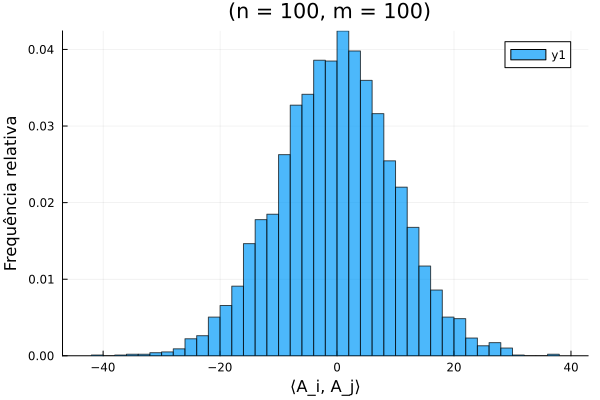

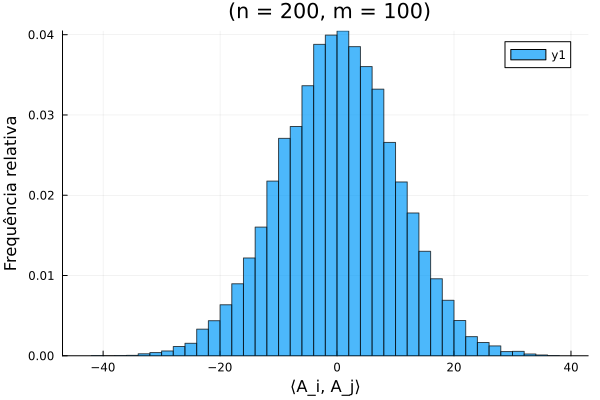

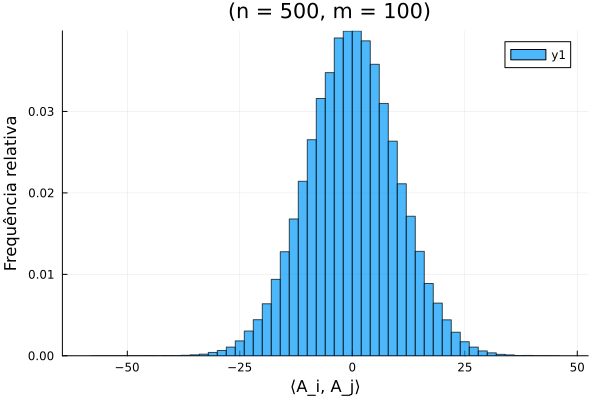

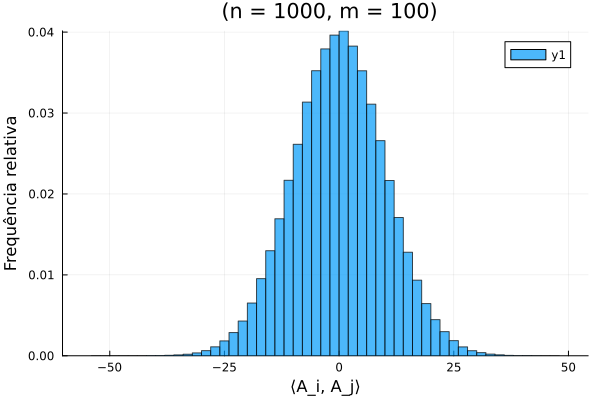

In [16]:
ms = 100
ns = [100, 200, 500, 1000]

#Questão b)

for n in ns
    A = randn(ms, n)
    dot_products = Float64[]
    for i in 1:n-1
        for j in i+1:n
            push!(dot_products, dot(A[:, i], A[:, j]))
        end
    end
    histogram(dot_products, bins=50, normalize=true, alpha=0.7,
              title=" (n = $n, m = $ms)",
              xlabel="⟨A_i, A_j⟩", ylabel="Frequência relativa")

    display(histogram(dot_products, bins=50, normalize=true, alpha=0.7,
              title=" (n = $n, m = $ms)",
              xlabel="⟨A_i, A_j⟩", ylabel="Frequência relativa"))
end

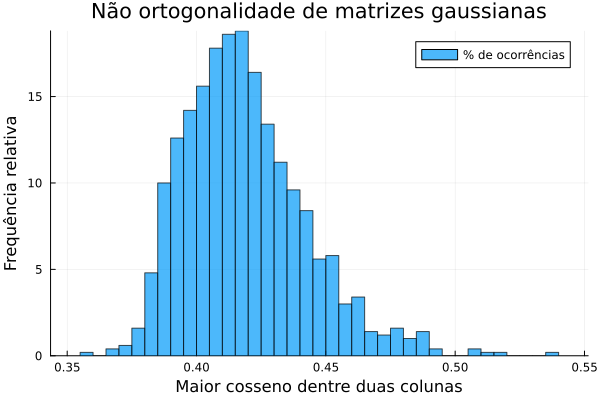

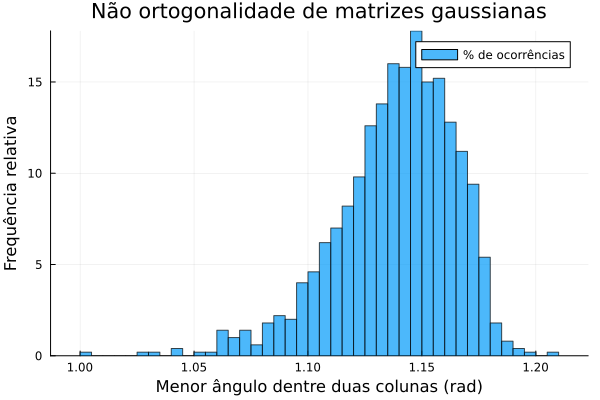

In [15]:
using LinearAlgebra
using Random
using Plots

function maxInnProd(m,n,K)
    A = zeros(m,n)
    listMaxInnProd = Float64[]
    for k in 1:K
        for j in 1:n
            A[:,j] = normalize!(randn(m))
        end
        maxInnProd = findmax([abs(dot(A[:,j],A[:,k])) for j = 1:n for k = j+1:n])[1]
        push!(listMaxInnProd,maxInnProd)
    end

    return listMaxInnProd
end

M = maxInnProd(100,300,1000)

Hcos = histogram(M, bins=50, normalize=true, alpha=0.7,
              title= "Não ortogonalidade de matrizes gaussianas",
              xlabel="Maior cosseno dentre duas colunas",
              ylabel="Frequência relativa",
              label = "% de ocorrências")
display(Hcos)

angles = [acos(x) for x in M]

Hangle = histogram(angles, bins=45, normalize=true, alpha=0.7,
              title= "Não ortogonalidade de matrizes gaussianas",
              xlabel="Menor ângulo dentre duas colunas (rad)",
              ylabel="Frequência relativa",
              label = "% de ocorrências")

display(Hangle)

